**Image Compression-SVD vs. DCT for checking Image Quality**

Singular Value Decomposition (SVD)
The image matrix is decomposed into three matrices: U, Σ Sigma, and VT. U and V are orthogonal matrices, while S contains the singular values.
Top k singular values are kept, which allows for compression. U and V are also truncated accordingly.
The image is reconstructed using the truncated matrices.

Discrete Cosine Transform (DCT):
DCT converts an image from the spatial domain to the frequency domain. By doing so, it has image's energy in a few coefficients, and discard the less significant coefficients to compress the image.
Quantization is a process where the less important high-frequency coefficients are rounded off to reduce precision, which leads to compression. DCT is widely used in image compression standards such as JPEG.


1.Load and Preprocess the Image
2.Singular Value Decomposition (SVD) Compression
Normalize the Image
Compute AAT and ATA (orthogonal matrix) and perform SVD for U, Sigma, Vt, V
Define eigenvectors of U, eigenvectors of V^T

3.Discrete Cosine Transform (DCT) Compression
Normalize the Image
Perform DCT and IDCT image
4.Evaluate Compression [values = [30, 20, 10, 5]]
5.Perform Compression and Display Results
6.Visualize DCT Basis Vectors


In [ ]:
import numpy as np
from PIL import Image

# Load the image from the specified path and convert it to grayscale
image_path = '/content/dg.JPG'  # Replace with your image path
original_img = Image.open(image_path).convert('L')  # Convert the image to grayscale

# Convert the grayscale image to a NumPy array (matrix) for further processing
original_array = np.array(original_img)

# Print the matrix representation of the original image
print("Original Image Matrix:")
print(original_array)

Original Image Matrix:
[[ 57  57  58 ... 106 106 107]
 [ 55  56  57 ... 107 107 108]
 [ 54  54  56 ... 108 108 109]
 ...
 [165 164 165 ... 178 179 184]
 [166 165 164 ... 180 177 177]
 [164 163 163 ... 186 175 177]]


In [ ]:
#Singular Value Decomposition (SVD)
def svd_compression(image, k=50):
    U, S, V = np.linalg.svd(image, full_matrices=False)

    print(f"\nU Matrix (k={k}):\n{U}")
    print(f"\nSingular Values (Sigma) (k={k}):\n{S}")
    print(f"\nV^T Matrix (k={k}):\n{V}")

    S_k = np.diag(S[:k])  # Top k singular values
    U_k = U[:, :k]        # First k columns of U
    V_k = V[:k, :]        # First k rows of V^T

    compressed = np.dot(U_k, np.dot(S_k, V_k))
    decompressed = np.clip(compressed, 0, 255).astype('uint8')

    print(f"\nSVD - Compressed Image Matrix (k={k}):\n{compressed}")
    print(f"\nSVD - Reconstructed Image Matrix (k={k}):\n{decompressed}")

    return compressed, decompressed


In [ ]:
from scipy.fftpack import dct, idct
#Discrete Cosine Transform (DCT) Compression
def dct_compression(image, k=50):
    dct_transformed = dct(dct(image.T, norm='ortho').T, norm='ortho')
    dct_transformed[k:, k:] = 0
    decompressed = idct(idct(dct_transformed.T, norm='ortho').T, norm='ortho')
    decompressed = np.clip(decompressed, 0, 255).astype('uint8')

    print(f"\nDCT - Compressed Image Matrix (k={k}):\n{dct_transformed}")
    print(f"\nDCT - Reconstructed Image Matrix (k={k}):\n{decompressed}")

    return dct_transformed, decompressed


In [ ]:
from skimage.metrics import structural_similarity as ssim
import math

def mse(imageA, imageB):
    err = np.sum((imageA - imageB) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse_value))

def calculate_compression_ratio(original_size, compressed_size):
    return original_size / compressed_size

def evaluate_compression(original, compressed, decompressed):
    original_size = len(original.tobytes())
    compressed_size = len(compressed.tobytes())

    compression_ratio = calculate_compression_ratio(original_size, compressed_size)
    mse_value = mse(original, decompressed)
    psnr_value = psnr(original, decompressed)
    ssim_value = ssim(original, decompressed, data_range=255)

    return compression_ratio, mse_value, psnr_value, ssim_value



U Matrix (k=30):
[[ 0.02856897  0.03083419 -0.00218442 ...  0.02706902  0.02838328
   0.03802966]
 [ 0.02850066  0.03033388 -0.00316007 ... -0.11333466 -0.05898513
  -0.08893169]
 [ 0.02842798  0.0299713  -0.00400773 ...  0.05777913  0.02689993
   0.00368557]
 ...
 [ 0.03634794  0.09488719 -0.01043144 ...  0.0308914  -0.0473977
   0.03050055]
 [ 0.03683479  0.09229858 -0.01132026 ... -0.03395845  0.0253565
  -0.02800992]
 [ 0.03743326  0.0914459  -0.01102349 ...  0.01336869 -0.0028511
   0.00397526]]

Singular Values (Sigma) (k=30):
[5.19492716e+04 1.41290652e+04 1.18134928e+04 9.46909815e+03
 7.87389062e+03 6.85876156e+03 4.88763525e+03 4.34322657e+03
 4.05191835e+03 3.88667753e+03 3.34224572e+03 2.57928188e+03
 2.47938900e+03 2.40271746e+03 2.17250883e+03 2.04158294e+03
 1.93607514e+03 1.81251964e+03 1.73615276e+03 1.63521282e+03
 1.63154717e+03 1.56637045e+03 1.50332396e+03 1.39721898e+03
 1.30992595e+03 1.28238654e+03 1.24132511e+03 1.18050144e+03
 1.13990782e+03 1.13548690e+03 1.

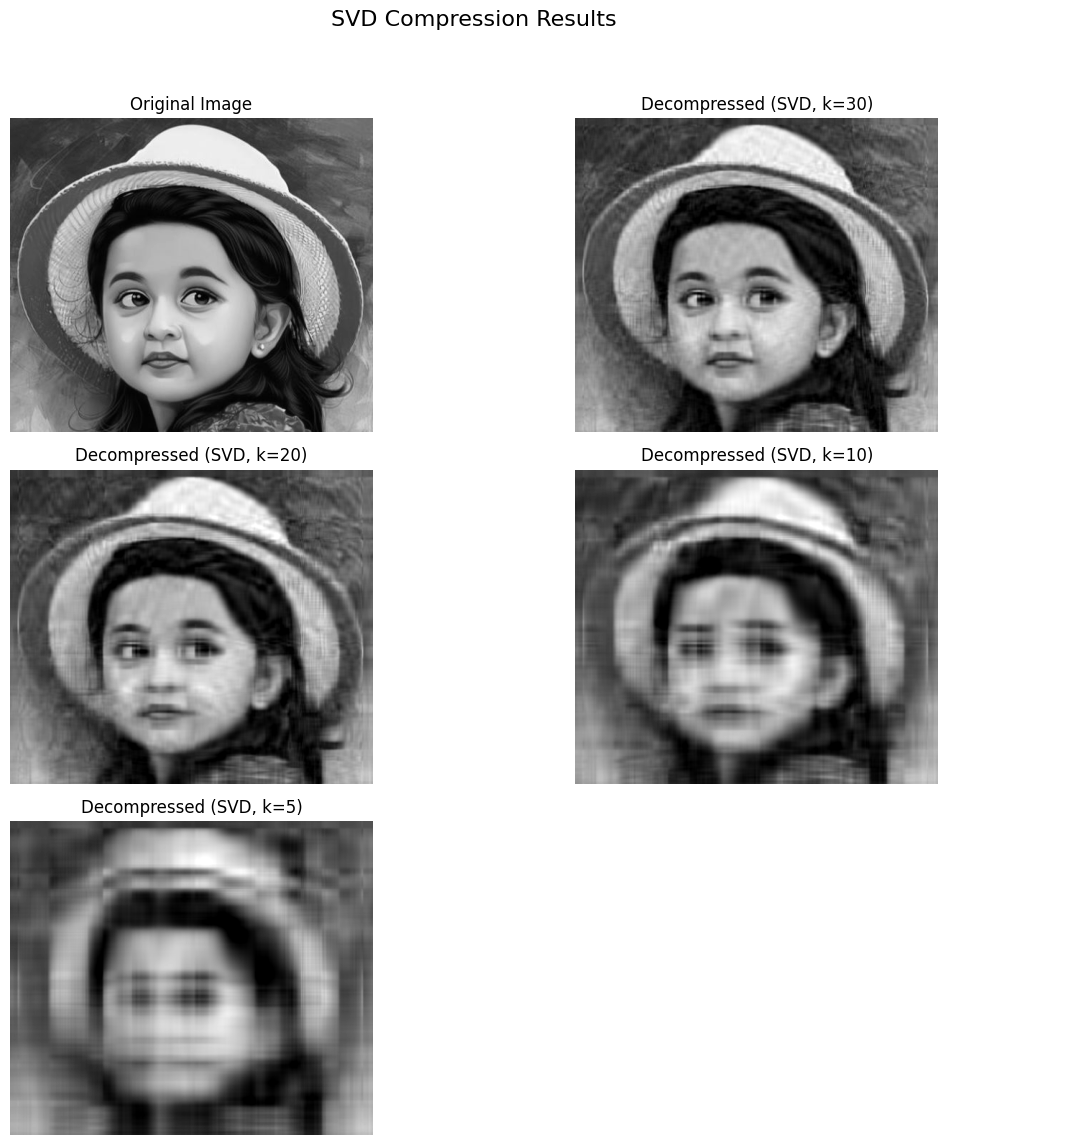

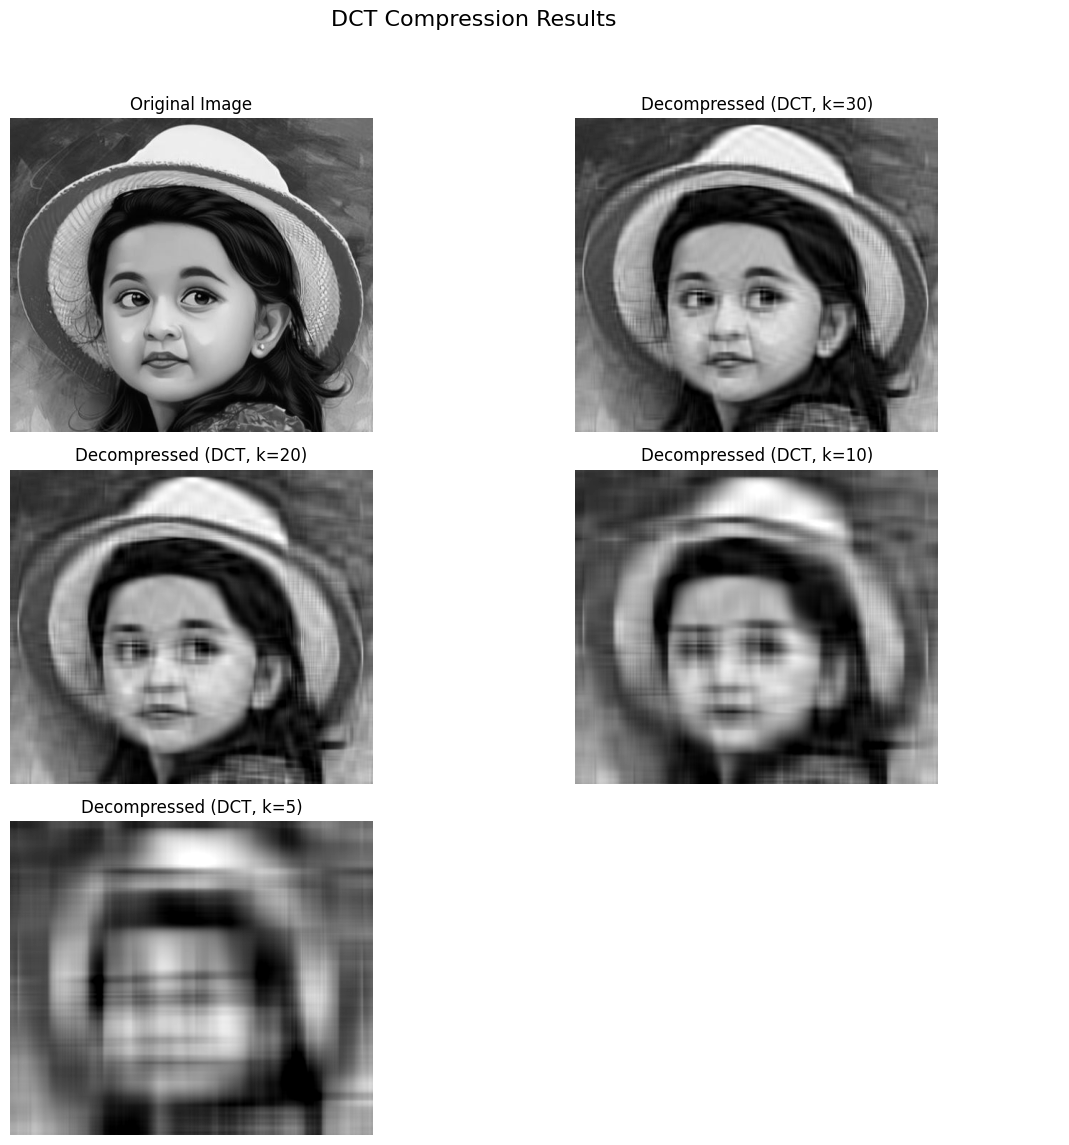

SVD Results:
k=30: Compression Ratio=0.12, MSE=51.92, PSNR=30.98dB, SSIM=0.7216
k=20: Compression Ratio=0.12, MSE=62.86, PSNR=30.15dB, SSIM=0.6651
k=10: Compression Ratio=0.12, MSE=79.77, PSNR=29.11dB, SSIM=0.5822
k=5: Compression Ratio=0.12, MSE=92.19, PSNR=28.48dB, SSIM=0.5144

DCT Results:
k=30: Compression Ratio=0.12, MSE=45.37, PSNR=31.56dB, SSIM=0.7551
k=20: Compression Ratio=0.12, MSE=57.63, PSNR=30.52dB, SSIM=0.6880
k=10: Compression Ratio=0.12, MSE=77.20, PSNR=29.25dB, SSIM=0.5799
k=5: Compression Ratio=0.12, MSE=93.02, PSNR=28.45dB, SSIM=0.4997


In [ ]:
import matplotlib.pyplot as plt

k_values = [30, 20, 10, 5]

# For SVD
svd_images = [original_array]
svd_titles = ['Original Image']
svd_results = []

for k in k_values:
    comp, deComp = svd_compression(original_array, k=k)
    svd_images.extend([deComp])
    svd_titles.extend([f'Decompressed (SVD, k={k})'])
    svd_results.append(evaluate_compression(original_array, comp, deComp))

# For DCT
dct_images = [original_array]
dct_titles = ['Original Image']
dct_results = []

for k in k_values:
    comp, deComp = dct_compression(original_array, k=k)
    dct_images.extend([deComp])
    dct_titles.extend([f'Decompressed (DCT, k={k})'])
    dct_results.append(evaluate_compression(original_array, comp, deComp))

# Display SVD and DCT images
def display_images_in_grid(images, titles, rows, cols, transformer_title):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.suptitle(transformer_title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(titles[i])
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

display_images_in_grid(svd_images, svd_titles, 3, 2, 'SVD Compression Results')
display_images_in_grid(dct_images, dct_titles, 3, 2, 'DCT Compression Results')

# Show results
print("SVD Results:")
for i, k in enumerate(k_values):
    cr, mse_value, psnr_value, ssim_value = svd_results[i]
    print(f"k={k}: Compression Ratio={cr:.2f}, MSE={mse_value:.2f}, PSNR={psnr_value:.2f}dB, SSIM={ssim_value:.4f}")

print("\nDCT Results:")
for i, k in enumerate(k_values):
    cr, mse_value, psnr_value, ssim_value = dct_results[i]
    print(f"k={k}: Compression Ratio={cr:.2f}, MSE={mse_value:.2f}, PSNR={psnr_value:.2f}dB, SSIM={ssim_value:.4f}")


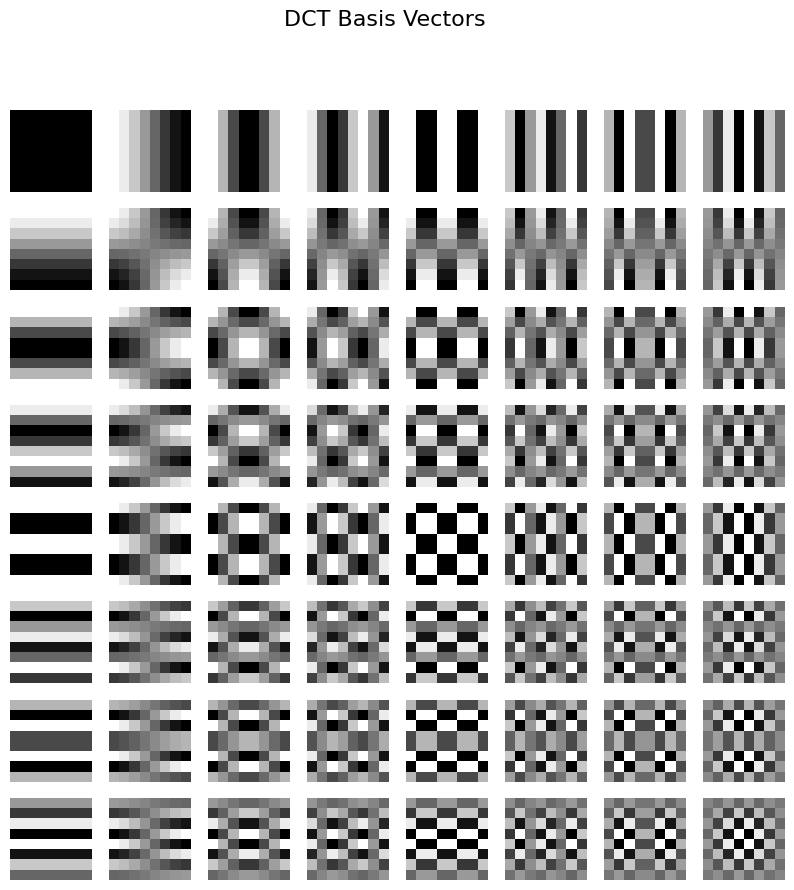

In [ ]:
def visualize_dct_basis(N=8):
    plt.figure(figsize=(10, 10))
    for i in range(N):
        for j in range(N):
            basis = np.zeros((N, N))
            basis[i, j] = 1
            plt.subplot(N, N, i*N + j + 1)
            plt.imshow(idct(idct(basis.T, norm='ortho').T, norm='ortho'), cmap='gray')
            plt.axis('off')
    plt.suptitle("DCT Basis Vectors", fontsize=16)
    plt.show()

visualize_dct_basis()


In [ ]:
import numpy as np
from PIL import Image
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

# Load the image from the specified path and convert it to grayscale
image_path = '/content/dg.JPG'  # Replace with your image path
original_img = Image.open(image_path).convert('L')  # Convert the image to grayscale

# Convert the grayscale image to a NumPy array (matrix) for further processing
original_array = np.array(original_img)

# Print the matrix representation of the original image
print("Original Image Matrix:")
print(original_array)



Original Image Matrix:
[[ 57  57  58 ... 106 106 107]
 [ 55  56  57 ... 107 107 108]
 [ 54  54  56 ... 108 108 109]
 ...
 [165 164 165 ... 178 179 184]
 [166 165 164 ... 180 177 177]
 [164 163 163 ... 186 175 177]]


In [ ]:
# Singular Value Decomposition (SVD) Compression
def svd_compression(image, k=50):
    # Perform Singular Value Decomposition
    U, S, V = np.linalg.svd(image, full_matrices=False)

    # Print matrices U, S, and V^T
    print(f"\nU Matrix (k={k}):\n{U}")
    print(f"\nSingular Values (Sigma) (k={k}):\n{S}")
    print(f"\nV^T Matrix (k={k}):\n{V}")

    # Construct the diagonal matrix S_k with the top k singular values
    S_k = np.diag(S[:k])
    # Select the first k columns of U and first k rows of V^T
    U_k = U[:, :k]
    V_k = V[:k, :]

    # Reconstruct the image from the compressed SVD components
    compressed = np.dot(U_k, np.dot(S_k, V_k))
    # Clip the values to be in the valid range [0, 255] and convert to uint8 type
    reconstructed = np.clip(compressed, 0, 255).astype('uint8')

    # Print compressed and reconstructed image matrices
    print(f"\nSVD - Compressed Image Matrix (k={k}):\n{compressed}")
    print(f"\nSVD - Reconstructed Image Matrix (k={k}):\n{reconstructed}")

    return compressed, reconstructed



In [ ]:
# Discrete Cosine Transform (DCT) Compression
def dct_compression(image, k=50):
    # Perform 2D DCT on the image
    dct_transformed = dct(dct(image.T, norm='ortho').T, norm='ortho')
    # Zero out the lower (k:, k:) part of the DCT-transformed image
    dct_transformed[k:, k:] = 0
    # Perform inverse 2D DCT to get the reconstructed image
    reconstructed = idct(idct(dct_transformed.T, norm='ortho').T, norm='ortho')
    # Clip the values to be in the valid range [0, 255] and convert to uint8 type
    reconstructed = np.clip(reconstructed, 0, 255).astype('uint8')

    # Print DCT compressed and reconstructed image matrices
    print(f"\nDCT - Compressed Image Matrix (k={k}):\n{dct_transformed}")
    print(f"\nDCT - Reconstructed Image Matrix (k={k}):\n{reconstructed}")

    return dct_transformed, reconstructed



In [ ]:
# Mean Squared Error (MSE) Calculation
def mse(imageA, imageB):
    # Calculate the mean squared error between two images
    err = np.sum((imageA - imageB) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
# Peak Signal-to-Noise Ratio (PSNR) Calculation
def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # Return infinity if there is no error
    # Compute PSNR based on MSE
    return 20 * math.log10(255.0 / math.sqrt(mse_value))
# Calculate Compression Ratio
def calculate_compression_ratio(original_size, compressed_size):
    return original_size / compressed_size

# Evaluate Compression Metrics
def evaluate_compression(original, compressed, reconstructed):
    # Calculate sizes of original and compressed images
    original_size = len(original.tobytes())
    compressed_size = len(compressed.tobytes())

    # Compute compression ratio, MSE, and PSNR
    compression_ratio = calculate_compression_ratio(original_size, compressed_size)
    mse_value = mse(original, reconstructed)
    psnr_value = psnr(original, reconstructed)
    return compression_ratio, mse_value, psnr_value




U Matrix (k=30):
[[ 0.02856897  0.03083419 -0.00218442 ...  0.02706902  0.02838328
   0.03802966]
 [ 0.02850066  0.03033388 -0.00316007 ... -0.11333466 -0.05898513
  -0.08893169]
 [ 0.02842798  0.0299713  -0.00400773 ...  0.05777913  0.02689993
   0.00368557]
 ...
 [ 0.03634794  0.09488719 -0.01043144 ...  0.0308914  -0.0473977
   0.03050055]
 [ 0.03683479  0.09229858 -0.01132026 ... -0.03395845  0.0253565
  -0.02800992]
 [ 0.03743326  0.0914459  -0.01102349 ...  0.01336869 -0.0028511
   0.00397526]]

Singular Values (Sigma) (k=30):
[5.19492716e+04 1.41290652e+04 1.18134928e+04 9.46909815e+03
 7.87389062e+03 6.85876156e+03 4.88763525e+03 4.34322657e+03
 4.05191835e+03 3.88667753e+03 3.34224572e+03 2.57928188e+03
 2.47938900e+03 2.40271746e+03 2.17250883e+03 2.04158294e+03
 1.93607514e+03 1.81251964e+03 1.73615276e+03 1.63521282e+03
 1.63154717e+03 1.56637045e+03 1.50332396e+03 1.39721898e+03
 1.30992595e+03 1.28238654e+03 1.24132511e+03 1.18050144e+03
 1.13990782e+03 1.13548690e+03 1.

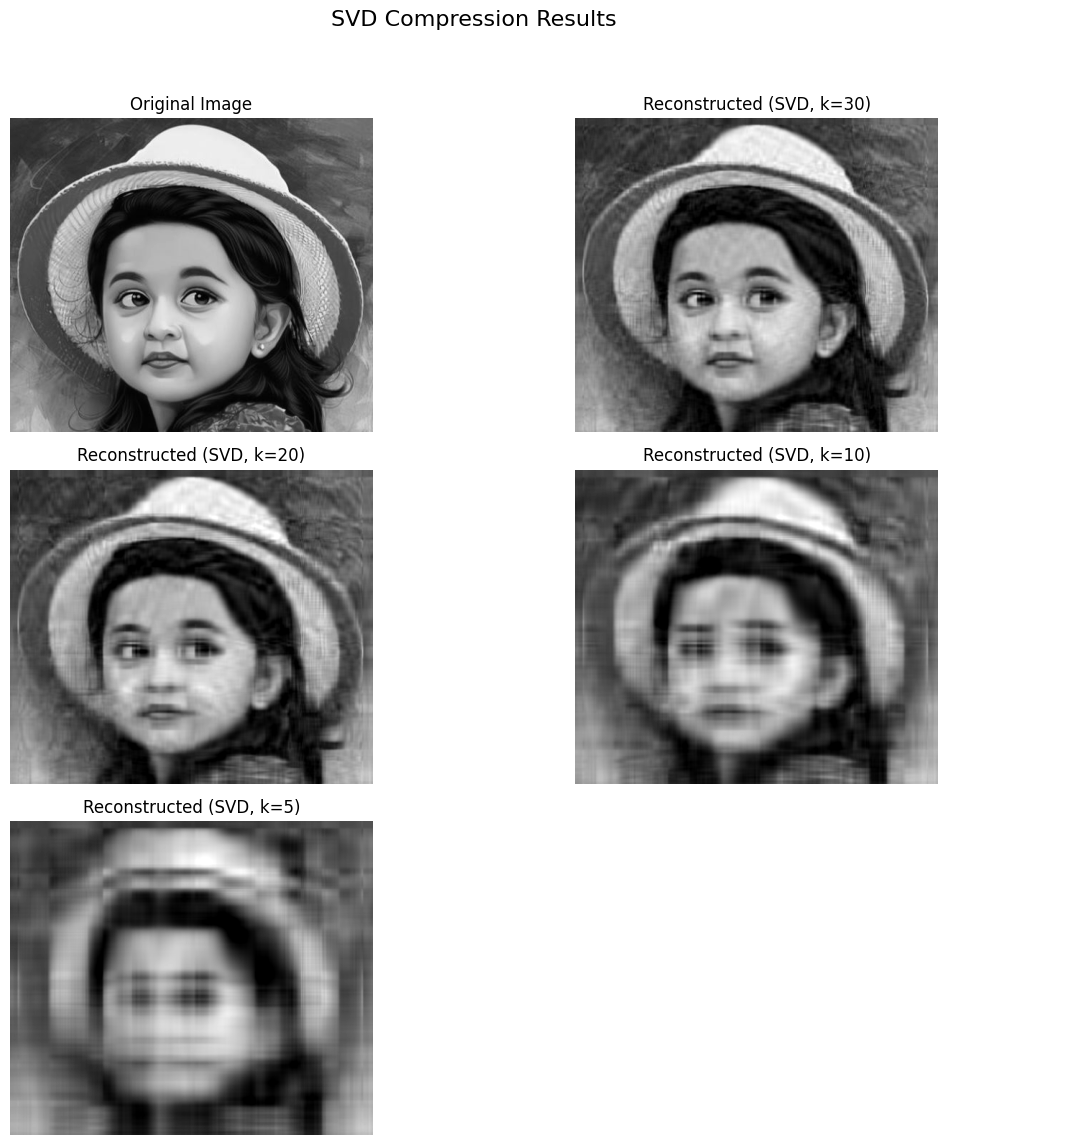

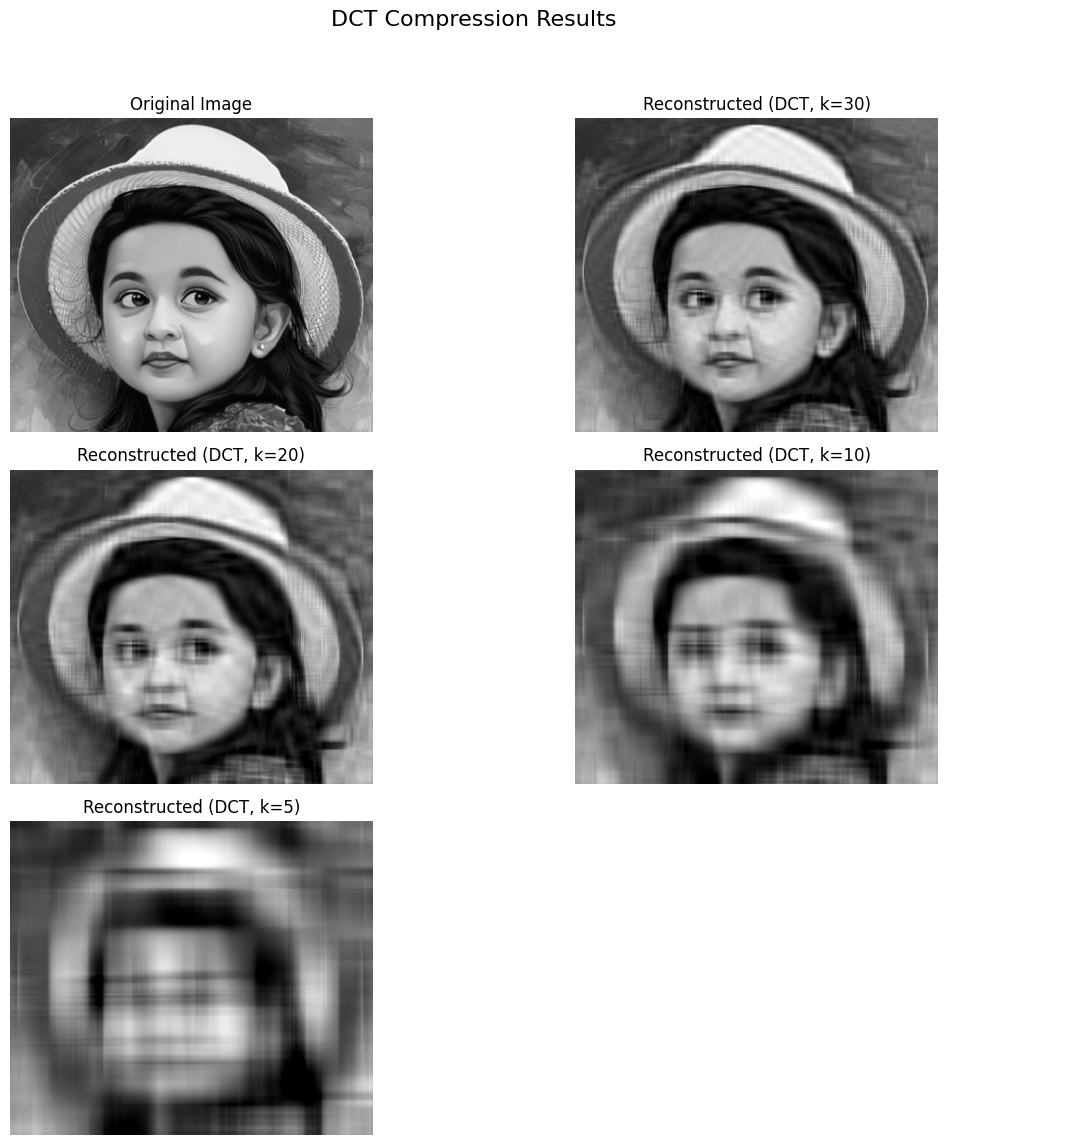

SVD Results:
k=30: Compression Ratio=0.12, MSE=51.92, PSNR=30.98dB
k=20: Compression Ratio=0.12, MSE=62.86, PSNR=30.15dB
k=10: Compression Ratio=0.12, MSE=79.77, PSNR=29.11dB
k=5: Compression Ratio=0.12, MSE=92.19, PSNR=28.48dB

DCT Results:
k=30: Compression Ratio=0.12, MSE=45.37, PSNR=31.56dB
k=20: Compression Ratio=0.12, MSE=57.63, PSNR=30.52dB
k=10: Compression Ratio=0.12, MSE=77.20, PSNR=29.25dB
k=5: Compression Ratio=0.12, MSE=93.02, PSNR=28.45dB


In [ ]:
# List of k values to test
k_values = [30, 20, 10, 5]

# Initialize lists for storing results
svd_images = [original_array]
svd_titles = ['Original Image']
svd_results = []

# Perform SVD compression for each k value
for k in k_values:
    comp, reconstructed = svd_compression(original_array, k=k)
    svd_images.extend([reconstructed])
    svd_titles.extend([f'Reconstructed (SVD, k={k})'])
    svd_results.append(evaluate_compression(original_array, comp, reconstructed))

# Initialize lists for storing DCT results
dct_images = [original_array]
dct_titles = ['Original Image']
dct_results = []

# Perform DCT compression for each k value
for k in k_values:
    comp, reconstructed = dct_compression(original_array, k=k)
    dct_images.extend([reconstructed])
    dct_titles.extend([f'Reconstructed (DCT, k={k})'])
    dct_results.append(evaluate_compression(original_array, comp, reconstructed))

# Function to display images in a grid format
def display_images_in_grid(images, titles, rows, cols, transformer_title):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.suptitle(transformer_title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(titles[i])
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display SVD and DCT results
display_images_in_grid(svd_images, svd_titles, 3, 2, 'SVD Compression Results')
display_images_in_grid(dct_images, dct_titles, 3, 2, 'DCT Compression Results')

# Show results for SVD compression
print("SVD Results:")
for i, k in enumerate(k_values):
    cr, mse_value, psnr_value = svd_results[i]
    print(f"k={k}: Compression Ratio={cr:.2f}, MSE={mse_value:.2f}, PSNR={psnr_value:.2f}dB")

# Show results for DCT compression
print("\nDCT Results:")
for i, k in enumerate(k_values):
    cr, mse_value, psnr_value = dct_results[i]
    print(f"k={k}: Compression Ratio={cr:.2f}, MSE={mse_value:.2f}, PSNR={psnr_value:.2f}dB")




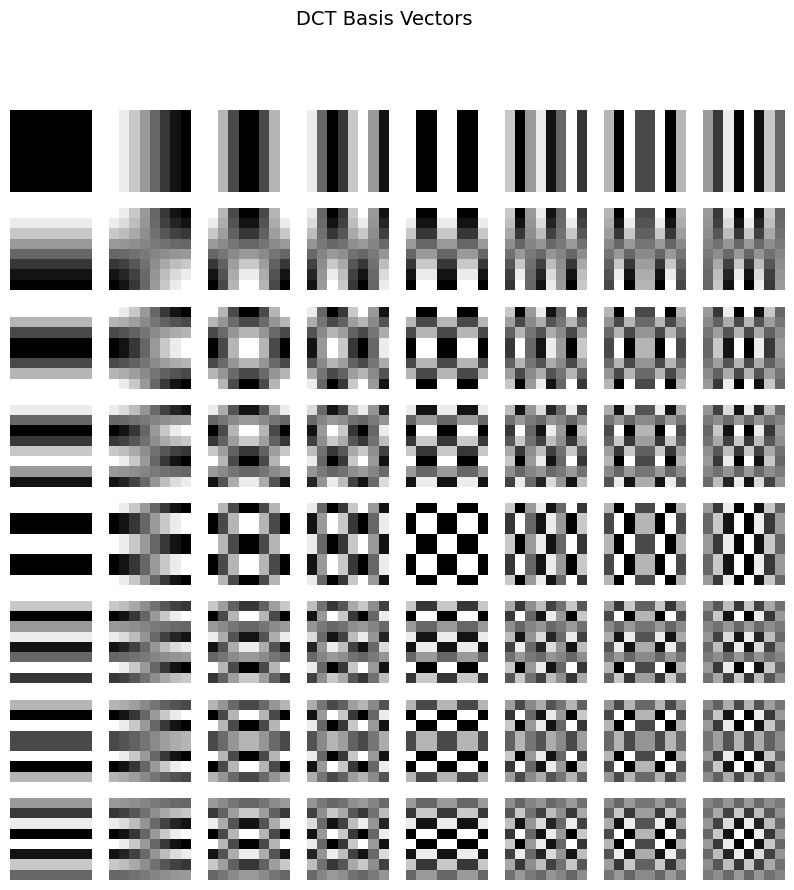

In [ ]:
# Function to visualize DCT Basis Vectors
def visualize_dct_basis(N=8):
    plt.figure(figsize=(10, 10))
    for i in range(N):
        for j in range(N):
            # Create a basis matrix for DCT
            basis = np.zeros((N, N))
            basis[i, j] = 1
            # Display the basis vector as an image
            plt.subplot(N, N, i*N + j + 1)
            plt.imshow(idct(idct(basis.T, norm='ortho').T, norm='ortho'), cmap='gray')
            plt.axis('off')
    plt.suptitle("DCT Basis Vectors", fontsize=14)
    plt.show()

# Visualize DCT Basis Vectors
visualize_dct_basis()

Original Image Matrix:
[[ 57  57  58 ... 106 106 107]
 [ 55  56  57 ... 107 107 108]
 [ 54  54  56 ... 108 108 109]
 ...
 [165 164 165 ... 178 179 184]
 [166 165 164 ... 180 177 177]
 [164 163 163 ... 186 175 177]]

U Matrix (k=30):
[[ 0.02856897  0.03083419 -0.00218442 ...  0.02706902  0.02838328
   0.03802966]
 [ 0.02850066  0.03033388 -0.00316007 ... -0.11333466 -0.05898513
  -0.08893169]
 [ 0.02842798  0.0299713  -0.00400773 ...  0.05777913  0.02689993
   0.00368557]
 ...
 [ 0.03634794  0.09488719 -0.01043144 ...  0.0308914  -0.0473977
   0.03050055]
 [ 0.03683479  0.09229858 -0.01132026 ... -0.03395845  0.0253565
  -0.02800992]
 [ 0.03743326  0.0914459  -0.01102349 ...  0.01336869 -0.0028511
   0.00397526]]

Singular Values (Sigma) (k=30):
[5.19492716e+04 1.41290652e+04 1.18134928e+04 9.46909815e+03
 7.87389062e+03 6.85876156e+03 4.88763525e+03 4.34322657e+03
 4.05191835e+03 3.88667753e+03 3.34224572e+03 2.57928188e+03
 2.47938900e+03 2.40271746e+03 2.17250883e+03 2.04158294e+03
 

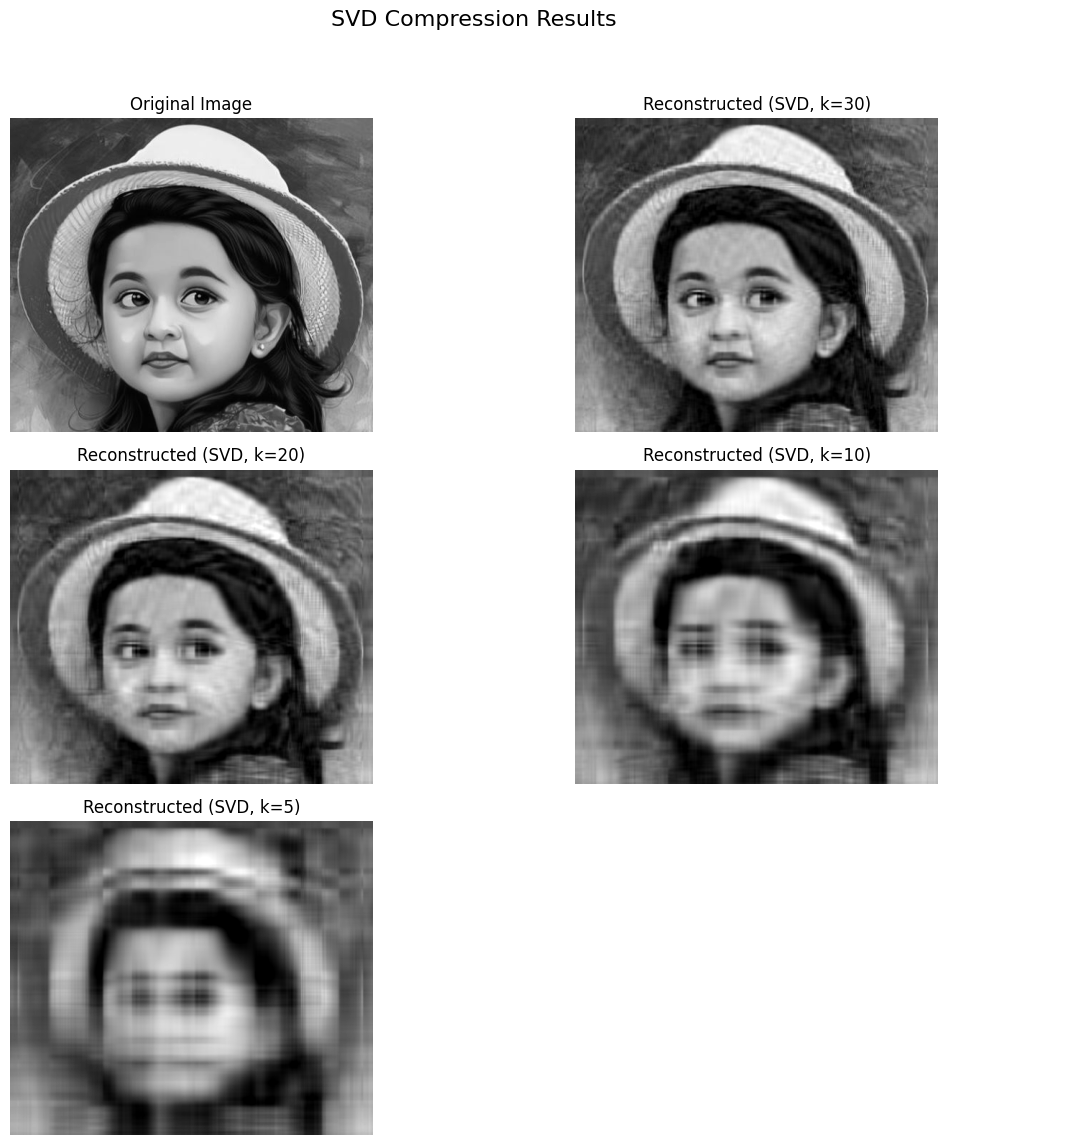

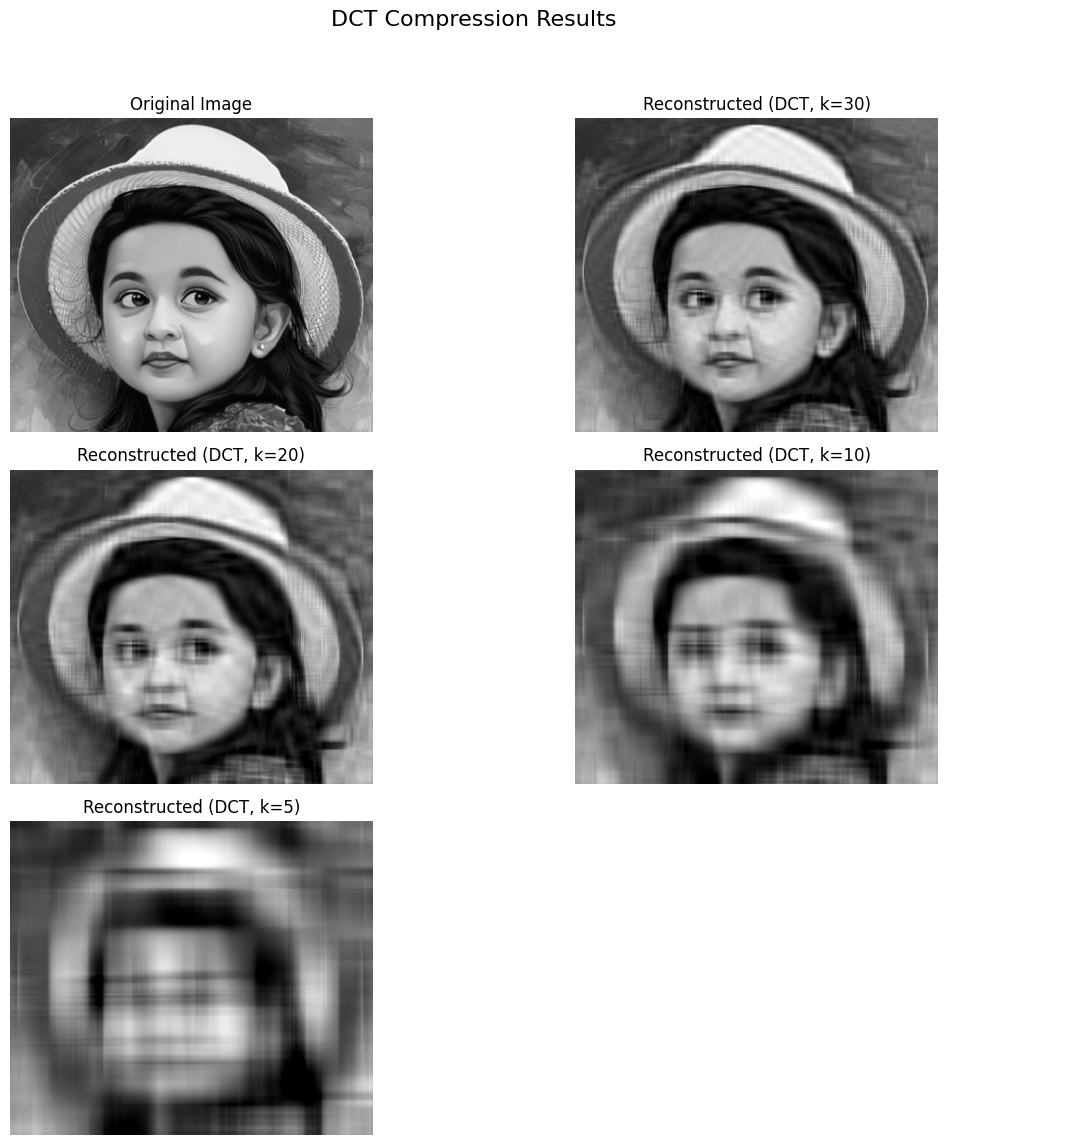

SVD Results:
k=30: Compression Ratio=0.12, MSE=51.92, PSNR=30.98dB
k=20: Compression Ratio=0.12, MSE=62.86, PSNR=30.15dB
k=10: Compression Ratio=0.12, MSE=79.77, PSNR=29.11dB
k=5: Compression Ratio=0.12, MSE=92.19, PSNR=28.48dB

DCT Results:
k=30: Compression Ratio=0.12, MSE=45.37, PSNR=31.56dB
k=20: Compression Ratio=0.12, MSE=57.63, PSNR=30.52dB
k=10: Compression Ratio=0.12, MSE=77.20, PSNR=29.25dB
k=5: Compression Ratio=0.12, MSE=93.02, PSNR=28.45dB


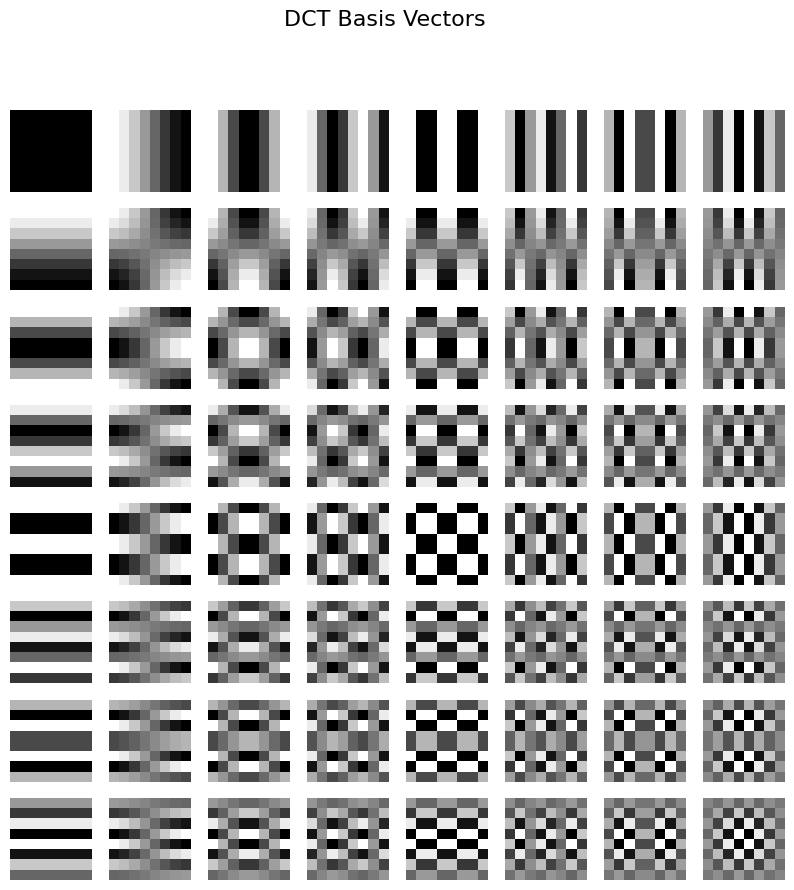

In [ ]:
#Final Code
import numpy as np
from PIL import Image
from scipy.fftpack import dct, idct
import math
import matplotlib.pyplot as plt

# Load the image from the specified path and convert it to grayscale
image_path = '/content/dg.JPG'  # Replace with your image path
original_img = Image.open(image_path).convert('L')  # Convert the image to grayscale
#image = image / 255.0  # Normalize

# Convert the grayscale image to a NumPy array (matrix) for further processing
original_array = np.array(original_img)

# Print the matrix representation of the original image
print("Original Image Matrix:")
print(original_array)

# Singular Value Decomposition (SVD) Compression
def svd_compression(image, k=50):
    # Perform Singular Value Decomposition
    U, S, V = np.linalg.svd(image, full_matrices=False)

    # Print matrices U, S, and V^T
    print(f"\nU Matrix (k={k}):\n{U}")
    print(f"\nSingular Values (Sigma) (k={k}):\n{S}")
    print(f"\nV^T Matrix (k={k}):\n{V}")

    # Construct the diagonal matrix S_k with the top k singular values
    S_k = np.diag(S[:k])
    # Select the first k columns of U and first k rows of V^T
    U_k = U[:, :k]
    V_k = V[:k, :]

    # Reconstruct the image from the compressed SVD components
    compressed = np.dot(U_k, np.dot(S_k, V_k))
    # Clip the values to be in the valid range [0, 255] and convert to uint8 type
    reconstructed = np.clip(compressed, 0, 255).astype('uint8')

    # Print compressed and reconstructed image matrices
    print(f"\nSVD - Compressed Image Matrix (k={k}):\n{compressed}")
    print(f"\nSVD - Reconstructed Image Matrix (k={k}):\n{reconstructed}")

    return compressed, reconstructed

# Discrete Cosine Transform (DCT) Compression
def dct_compression(image, k=50):
    # Perform 2D DCT on the image
    dct_transformed = dct(dct(image.T, norm='ortho').T, norm='ortho')
    # Zero out the lower (k:, k:) part of the DCT-transformed image
    dct_transformed[k:, k:] = 0
    # Perform inverse 2D DCT to get the reconstructed image
    reconstructed = idct(idct(dct_transformed.T, norm='ortho').T, norm='ortho')
    # Clip the values to be in the valid range [0, 255] and convert to uint8 type
    reconstructed = np.clip(reconstructed, 0, 255).astype('uint8')

    # Print DCT compressed and reconstructed image matrices
    print(f"\nDCT - Compressed Image Matrix (k={k}):\n{dct_transformed}")
    print(f"\nDCT - Reconstructed Image Matrix (k={k}):\n{reconstructed}")

    return dct_transformed, reconstructed

# Mean Squared Error (MSE) Calculation
def mse(imageA, imageB):
    # Calculate the mean squared error between two images
    err = np.sum((imageA - imageB) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Peak Signal-to-Noise Ratio (PSNR) Calculation
def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')  # Return infinity if there is no error
    # Compute PSNR based on MSE
    return 20 * math.log10(255.0 / math.sqrt(mse_value))

# Calculate Compression Ratio
def calculate_compression_ratio(original_size, compressed_size):
    return original_size / compressed_size

# Evaluate Compression Metrics
def evaluate_compression(original, compressed, reconstructed):
    # Calculate sizes of original and compressed images
    original_size = len(original.tobytes())
    compressed_size = len(compressed.tobytes())

    # Compute compression ratio, MSE, and PSNR
    compression_ratio = calculate_compression_ratio(original_size, compressed_size)
    mse_value = mse(original, reconstructed)
    psnr_value = psnr(original, reconstructed)

    return compression_ratio, mse_value, psnr_value

# List of k values to test
k_values = [30, 20, 10, 5]

# Initialize lists for storing results
svd_images = [original_array]
svd_titles = ['Original Image']
svd_results = []

# Perform SVD compression for each k value
for k in k_values:
    comp, reconstructed = svd_compression(original_array, k=k)
    svd_images.extend([reconstructed])
    svd_titles.extend([f'Reconstructed (SVD, k={k})'])
    svd_results.append(evaluate_compression(original_array, comp, reconstructed))

# Initialize lists for storing DCT results
dct_images = [original_array]
dct_titles = ['Original Image']
dct_results = []

# Perform DCT compression for each k value
for k in k_values:
    comp, reconstructed = dct_compression(original_array, k=k)
    dct_images.extend([reconstructed])
    dct_titles.extend([f'Reconstructed (DCT, k={k})'])
    dct_results.append(evaluate_compression(original_array, comp, reconstructed))

# Function to display images in a grid format
def display_images_in_grid(images, titles, rows, cols, transformer_title):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    fig.suptitle(transformer_title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray')
            ax.set_title(titles[i])
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display SVD and DCT results
display_images_in_grid(svd_images, svd_titles, 3, 2, 'SVD Compression Results')
display_images_in_grid(dct_images, dct_titles, 3, 2, 'DCT Compression Results')

# Show results for SVD compression
print("SVD Results:")
for i, k in enumerate(k_values):
    cr, mse_value, psnr_value = svd_results[i]
    print(f"k={k}: Compression Ratio={cr:.2f}, MSE={mse_value:.2f}, PSNR={psnr_value:.2f}dB")

# Show results for DCT compression
print("\nDCT Results:")
for i, k in enumerate(k_values):
    cr, mse_value, psnr_value = dct_results[i]
    print(f"k={k}: Compression Ratio={cr:.2f}, MSE={mse_value:.2f}, PSNR={psnr_value:.2f}dB")

# Function to visualize DCT Basis Vectors
def visualize_dct_basis(N=8):
    plt.figure(figsize=(10, 10))
    for i in range(N):
        for j in range(N):
            # Create a basis matrix for DCT
            basis = np.zeros((N, N))
            basis[i, j] = 1
            # Display the basis vector as an image
            plt.subplot(N, N, i*N + j + 1)
            plt.imshow(idct(idct(basis.T, norm='ortho').T, norm='ortho'), cmap='gray')
            plt.axis('off')
    plt.suptitle("DCT Basis Vectors", fontsize=16)
    plt.show()

# Visualize DCT Basis Vectors
visualize_dct_basis()


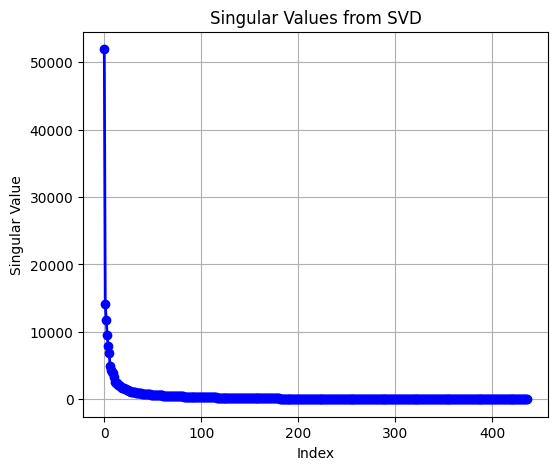

In [ ]:
# Plot the singular values
plt.figure(figsize=(6, 5))
plt.plot(S, 'bo-', linewidth=2)
plt.title('Singular Values from SVD')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()


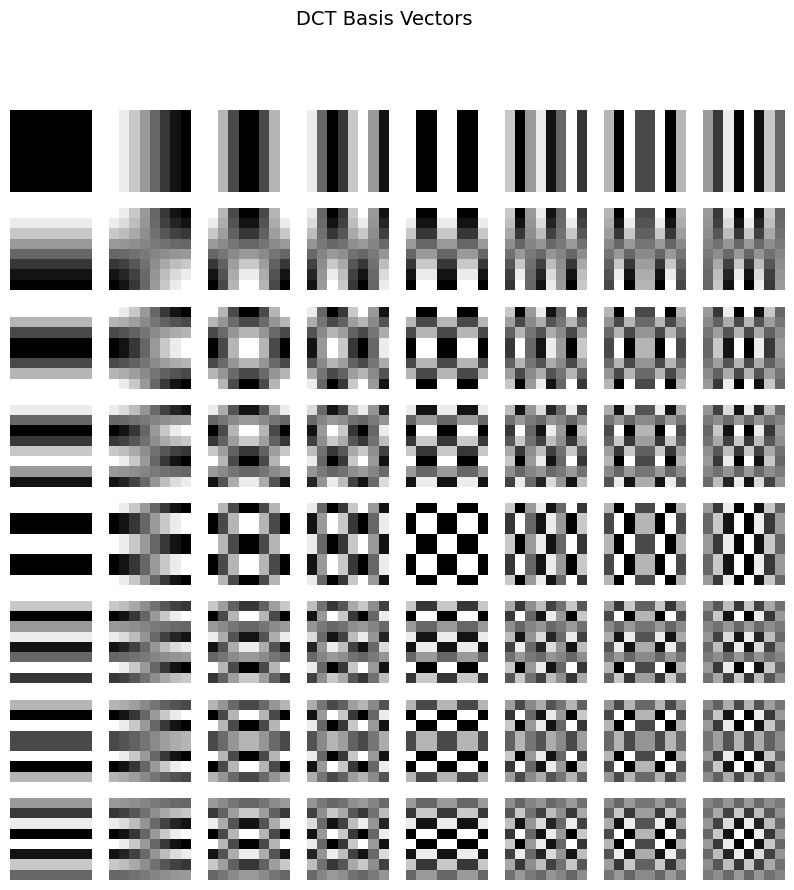

In [ ]:
# Function to visualize DCT Basis Vectors
def visualize_dct_basis(N=8):
    plt.figure(figsize=(10, 10))
    for i in range(N):
        for j in range(N):
            # Create a basis matrix for DCT
            basis = np.zeros((N, N))
            basis[i, j] = 1
            # Display the basis vector as an image
            plt.subplot(N, N, i*N + j + 1)
            plt.imshow(idct(idct(basis.T, norm='ortho').T, norm='ortho'), cmap='gray')
            plt.axis('off')
    plt.suptitle("DCT Basis Vectors", fontsize=14)
    plt.show()

# Visualize DCT Basis Vectors
visualize_dct_basis()